In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install --upgrade nltk

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [19]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91636\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91636\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\91636\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [21]:
data = pd.read_csv('flipkart_data.csv')

In [22]:
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [23]:
data['label'] = (data['rating'] >= 5).astype(int)


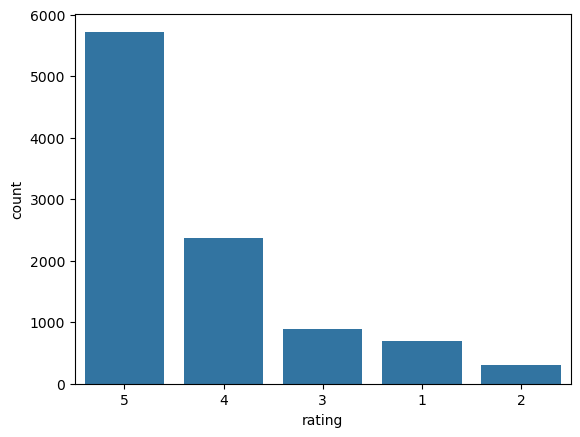

In [24]:
sns.countplot(x=data['rating'], order=data['rating'].value_counts().index)
plt.show()


In [25]:
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    words = word_tokenize(re.sub(r'[^\w\s]', '', str(text).lower()))
    return ' '.join(word for word in words if word not in stop_words)

# Apply preprocessing
data['review'] = data['review'].astype(str).apply(preprocess_text)


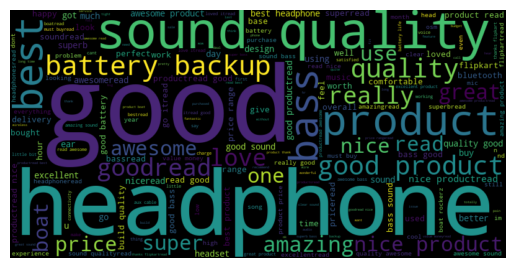

In [26]:
positive_text = ' '.join(data[data['label'] == 1]['review'])
plt.imshow(WordCloud(width=800, height=400).generate(positive_text), interpolation='bilinear')
plt.axis('off')
plt.show()


In [27]:
vectorizer = TfidfVectorizer(max_features=2500)
X = vectorizer.fit_transform(data['review']).toarray()
y = data['label']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)


In [32]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train);


In [30]:
train_accuracy = accuracy_score(y_train, model.predict(X_train))
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.92


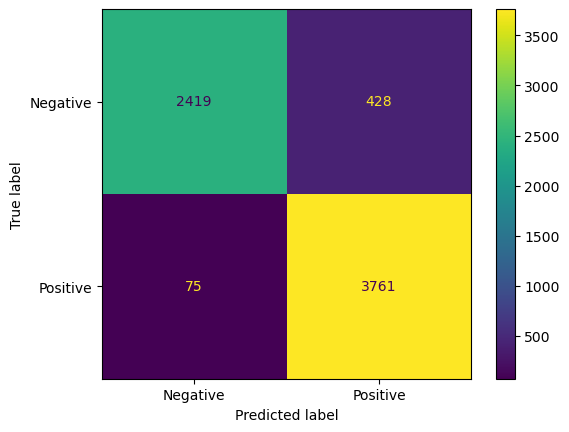

In [31]:
cm = confusion_matrix(y_train, model.predict(X_train))
ConfusionMatrixDisplay(cm, display_labels=['Negative', 'Positive']).plot()
plt.show()

# Distribution of Positive vs Negative Reviews

C:\Users\91636\AppData\Local\Temp\ipykernel_30032\3907717410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['label'], palette=['red', 'blue'])


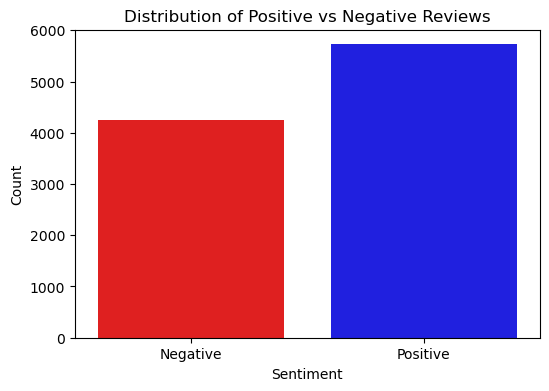

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data['label'], palette=['red', 'blue'])
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of Positive vs Negative Reviews")
plt.show()


# WordCloud for Negative Reviews

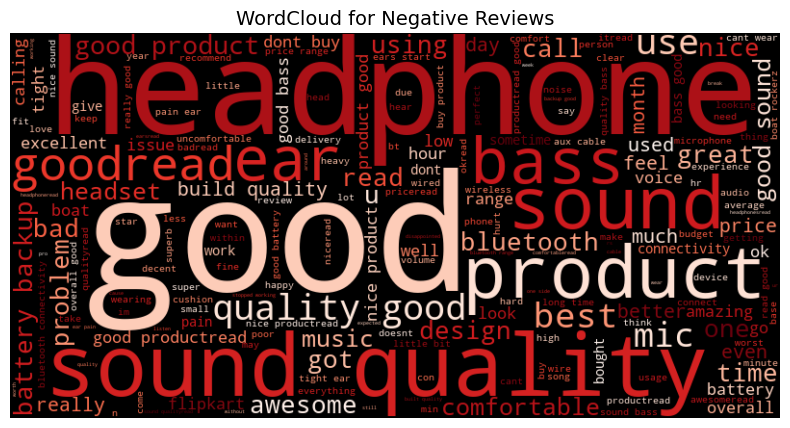

In [36]:
negative_text = ' '.join(data[data['label'] == 0]['review'])
plt.figure(figsize=(10, 5))
plt.imshow(WordCloud(width=800, height=400, colormap="Reds").generate(negative_text), interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Negative Reviews", fontsize=14)
plt.show()


# Feature Importance from Decision Tree

C:\Users\91636\AppData\Local\Temp\ipykernel_30032\1235706834.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[sorted_idx], y=[feature_names[i] for i in sorted_idx], palette="viridis")


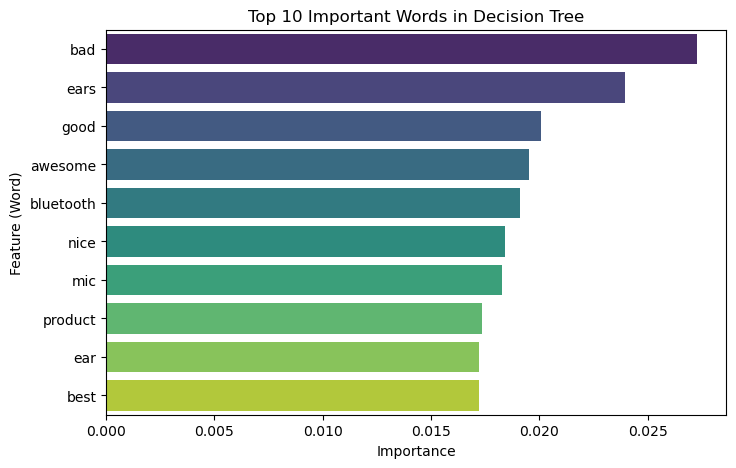

In [37]:
feature_importance = model.feature_importances_
top_n = 10  # Show top 10 important words

# Get feature names from vectorizer
feature_names = vectorizer.get_feature_names_out()
sorted_idx = feature_importance.argsort()[-top_n:][::-1]  # Get top n indices

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance[sorted_idx], y=[feature_names[i] for i in sorted_idx], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature (Word)")
plt.title("Top 10 Important Words in Decision Tree")
plt.show()
